In [3]:
# Block 1: Install required packages (if not already installed)
!pip install yfinance matplotlib --quiet


In [4]:
# Block 2: Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
# Block 3: Set display options for better visualization
pd.set_option("display.max_rows", 10)
pd.set_option("display.float_format", "{:.2f}".format)


In [6]:
# Block 4: Download historical stock data for Apple (AAPL)
stock = yf.Ticker("AAPL")
df = stock.history(period="1y")
df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-06-28 00:00:00-04:00,214.77,215.06,209.32,209.64,82542700,0.00,0.00
2024-07-01 00:00:00-04:00,211.10,216.50,210.93,215.74,60402900,0.00,0.00
2024-07-02 00:00:00-04:00,215.14,219.35,214.10,219.24,58046200,0.00,0.00
2024-07-03 00:00:00-04:00,218.98,220.52,218.01,220.52,37369800,0.00,0.00
2024-07-05 00:00:00-04:00,220.62,225.40,220.62,225.29,60412400,0.00,0.00


In [7]:
# Block 5: Basic Information
print("Company Info:")
stock.info['longBusinessSummary'][:300] + "..."


Company Info:


'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising Ai...'

In [8]:
# Block 6: Describe the dataset
df.describe()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,250.00,250.00,250.00,250.00,250.00,250.00,250.00
mean,222.36,224.92,220.02,222.67,53516737.60,0.00,0.00
std,15.69,15.12,15.96,15.61,27343853.63,0.03,0.00
min,171.72,190.09,168.99,172.19,23234700.00,0.00,0.00
25%,211.19,214.02,209.38,212.35,39510475.00,0.00,0.00
50%,224.17,226.07,222.23,224.21,46906700.00,0.00,0.00
75%,232.45,234.26,229.18,232.52,58825975.00,0.00,0.00
max,257.57,259.47,257.01,258.40,318679900.00,0.26,0.00


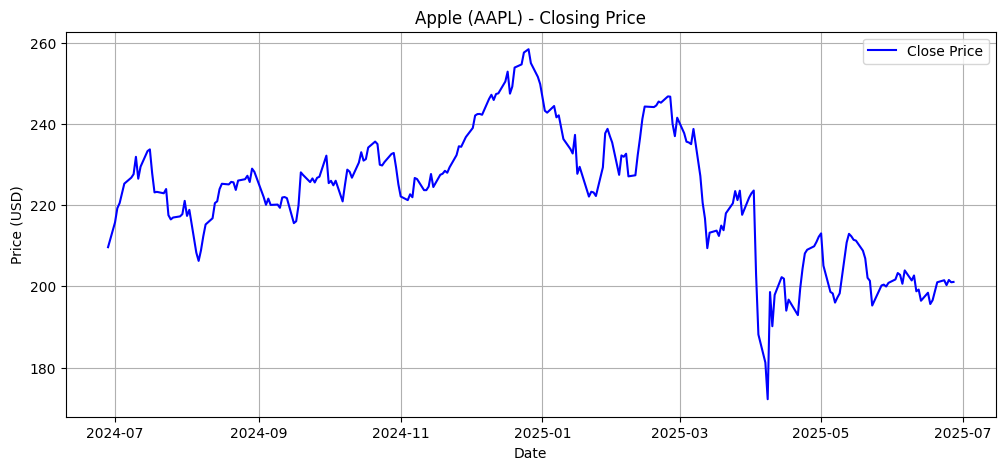

In [9]:
# Block 7: Plot closing price
plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label="Close Price", color='blue')
plt.title("Apple (AAPL) - Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Block 8: Calculate Moving Averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df[['Close', 'MA20', 'MA50']].tail()


,Close,MA20,MA50
Date,,,
2025-06-23 00:00:00-04:00,201.50,200.04,202.30
2025-06-24 00:00:00-04:00,200.30,200.29,202.50
2025-06-25 00:00:00-04:00,201.56,200.36,202.57
2025-06-26 00:00:00-04:00,201.00,200.38,202.55
2025-06-27 00:00:00-04:00,201.08,200.44,202.53


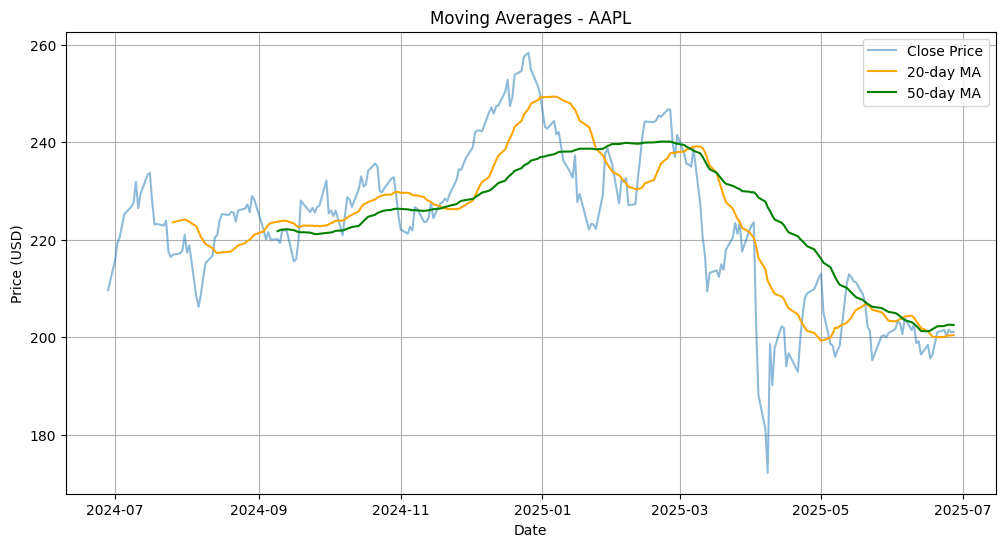

In [11]:
# Block 9: Plot Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['MA20'], label='20-day MA', color='orange')
plt.plot(df['MA50'], label='50-day MA', color='green')
plt.title("Moving Averages - AAPL")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


<Axes: title={'center': 'Trading Volume Distribution'}, ylabel='Frequency'>

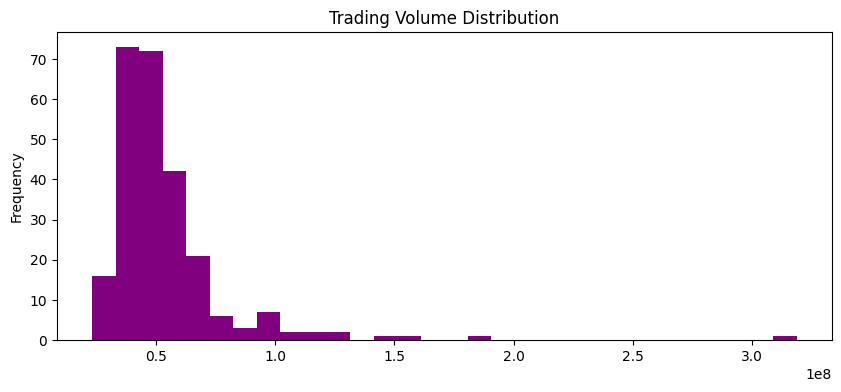

In [12]:
# Block 10: Volume analysis
df['Volume'].plot(kind='hist', bins=30, color='purple', figsize=(10, 4), title='Trading Volume Distribution')


<Axes: title={'center': 'Daily Return (%)'}, xlabel='Date'>

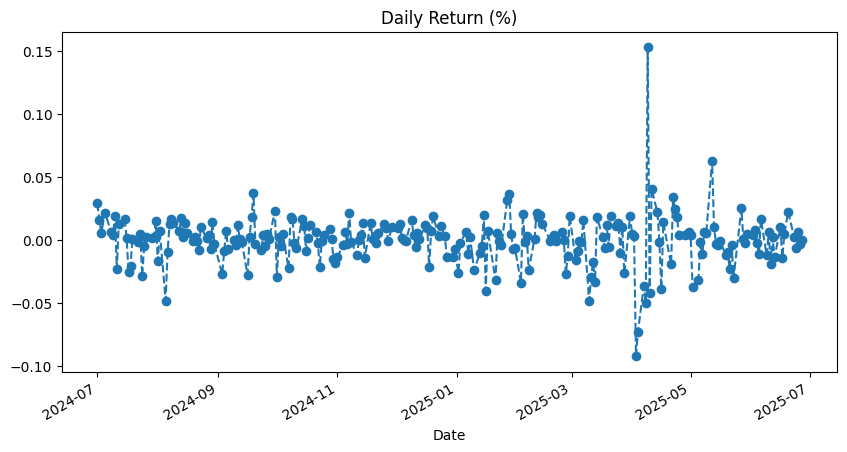

In [13]:
# Block 11: Daily Returns
df['Daily Return'] = df['Close'].pct_change()
df['Daily Return'].dropna().plot(figsize=(10, 5), linestyle='--', marker='o', title="Daily Return (%)")


In [14]:
# Block 12: Correlation Matrix (simulate multiple stocks)
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN']
df_multi = yf.download(tickers, period="6mo")['Close']
df_multi = df_multi.pct_change().dropna()
correlation = df_multi.corr()
correlation


C:\Users\HP\AppData\Local\Temp\ipykernel_6508\2024470801.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_multi = yf.download(tickers, period="6mo")['Close']
[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Ticker,,,,
AAPL,1.00,0.70,0.56,0.62
AMZN,0.70,1.00,0.71,0.74
GOOG,0.56,0.71,1.00,0.60
MSFT,0.62,0.74,0.60,1.00


Text(0.5, 1.0, 'Correlation Between Stocks')

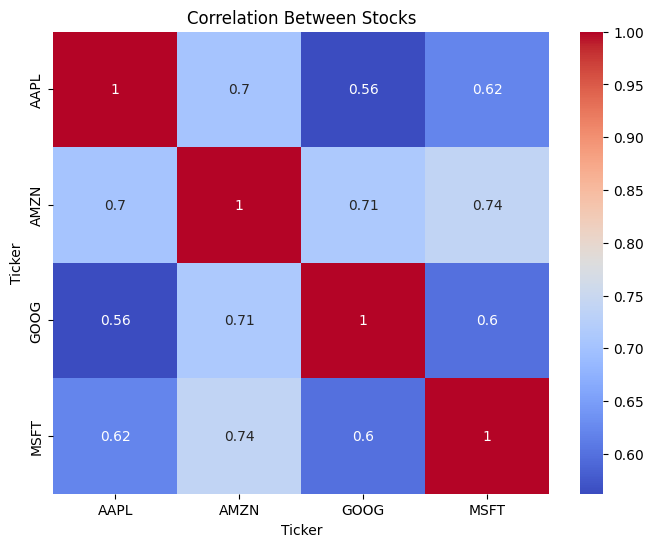

In [15]:
# Block 13: Heatmap of correlation
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Between Stocks")


In [19]:
# Block 14: Candlestick Chart (optional for advanced visuals)
!pip install plotly




In [20]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.update_layout(title='Candlestick Chart - AAPL', xaxis_rangeslider_visible=False)
fig.show()


In [21]:
# Block 15: Highest closing price
highest = df['Close'].max()
print(f"Highest Closing Price in the Last 1 Year: ${highest:.2f}")


Highest Closing Price in the Last 1 Year: $258.40


In [22]:
# Block 16: Lowest closing price
lowest = df['Close'].min()
print(f"Lowest Closing Price in the Last 1 Year: ${lowest:.2f}")


Lowest Closing Price in the Last 1 Year: $172.19


In [23]:
# Block 17: Save processed data to CSV
df.to_csv("AAPL_Processed.csv")
print("Saved to AAPL_Processed.csv")


Saved to AAPL_Processed.csv


In [24]:
# Block 18: Display final data sample
df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA20,MA50,Daily Return
Date,,,,,,,,,,
2025-06-23 00:00:00-04:00,201.63,202.30,198.96,201.50,55814300,0.00,0.00,200.04,202.30,0.00
2025-06-24 00:00:00-04:00,202.59,203.44,200.20,200.30,54064000,0.00,0.00,200.29,202.50,-0.01
2025-06-25 00:00:00-04:00,201.45,203.67,200.62,201.56,39525700,0.00,0.00,200.36,202.57,0.01
2025-06-26 00:00:00-04:00,201.43,202.64,199.46,201.00,50799100,0.00,0.00,200.38,202.55,-0.00
2025-06-27 00:00:00-04:00,201.89,203.22,200.00,201.08,73114100,0.00,0.00,200.44,202.53,0.00
